In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob as glob
import cv2
import random

ModuleNotFoundError: No module named 'cv2'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
Train_data=pd.read_csv('/content/drive/MyDrive/Defect_inspection/Train/train_data_csv.csv')

In [4]:
Test_data=pd.read_csv('/content/drive/MyDrive/Defect_inspection/Test/test_data_csv.csv')

In [6]:
Train_data=Train_data[['folder','num_files','label']]
Train_data.head()

,folder,num_files,label
0,170906-120346-Al 2mm,1165,0
1,170913-151508-Al 2mm-part1,371,0
2,170913-142501-Al 2mm,770,0
3,170905-115602-Al 2mm,914,0
4,170913-143933-Al 2mm-part1,379,0


In [7]:
Test_data=Test_data[['folder','num_files','label']]
Test_data.head()

,folder,num_files,label
0,170913-154448-Al 2mm,427,0
1,170905-112213-Al 2mm,585,0
2,170906-113317-Al 2mm-part1,526,0
3,170906-104925-Al 2mm,651,0
4,170906-143512-Al 2mm-part2,351,1


In [10]:
Train_data_path='/content/drive/MyDrive/Defect_inspection/Train/train/'
Test_data_path='/content/drive/MyDrive/Defect_inspection/Test/test/'

**Plot_Samples**

In [21]:
def plot_class_sample(class_name,data_path):
    fig,ax=plt.subplots(2,2,figsize=(15,15))
    ax=ax.flatten()
    for i in range(4):
            location_files=data_path+'/'+class_name
            img=str(*random.sample(os.listdir(location_files),1))
            img_path=location_files+'/'+img
            ax[i].imshow(cv2.imread(img_path))
            ax[i].set_title(class_name)

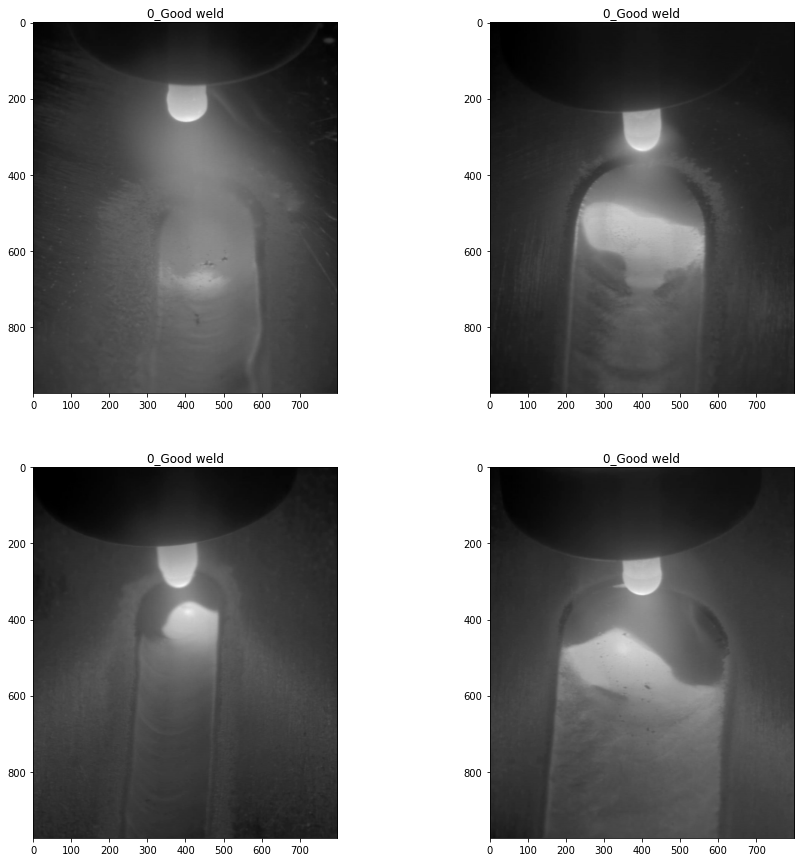

In [22]:
plot_class_sample('0_Good weld',Train_data_path)

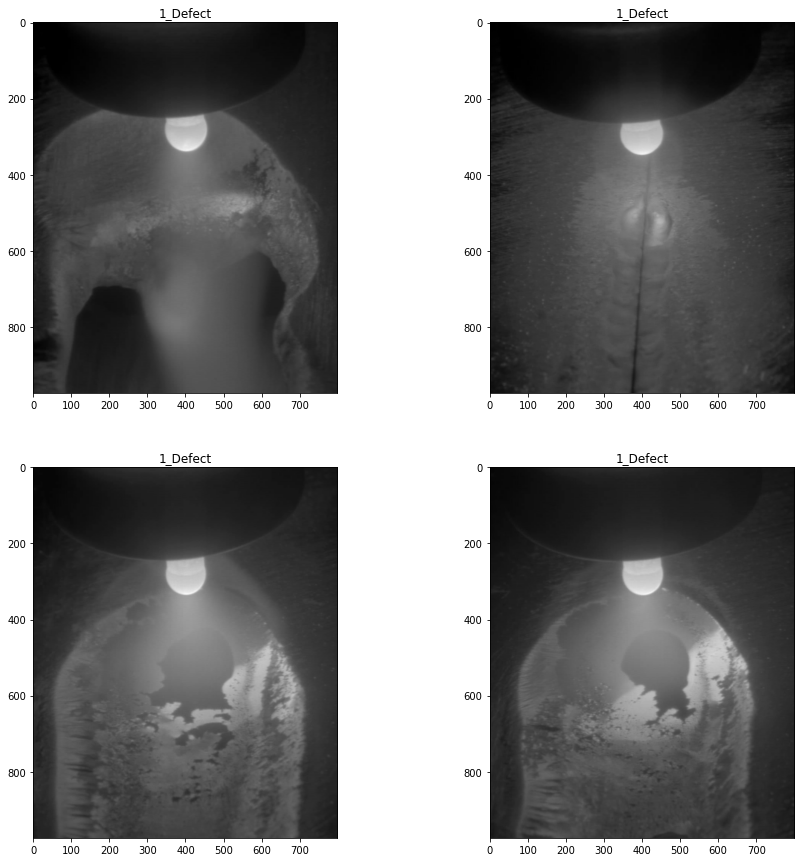

In [23]:
plot_class_sample('1_Defect',Train_data_path)

In [36]:
All_data_csv=pd.concat([Train_data,Test_data],axis=0)
All_data_csv.reset_index(inplace=True)

**Get Stats about Data**

In [73]:
def display_stats_about_Data(Data,query):
  if query=='no of labels':
    return Data['label'].nunique()
  elif query=='Description':
    return Data.describe()
  elif query=='Files_Per_Group':
    return Data.groupby('label')['num_files'].sum()
  elif query=='visualization':
    Data[['label']]=Data[['label']].astype(str)
    Data=pd.DataFrame(Data.groupby('label')['num_files'].sum())
    Data=Data.reset_index()
    plt.bar(Data['label'],Data['num_files'])
    plt.title("frequency of no of images in each directory")


In [30]:
display_stats_about_Data(All_data_csv,'no of labels')

2

In [31]:
display_stats_about_Data(All_data_csv,'Description')

,num_files,label
count,60.000000,60.000000
mean,554.233333,0.733333
std,474.559041,0.445948
min,24.000000,0.000000
25%,205.500000,0.000000
50%,415.000000,1.000000
75%,845.250000,1.000000
max,2460.000000,1.000000


In [32]:
display_stats_about_Data(All_data_csv,'Files_Per_Group')

label
0    10947
1    22307
Name: num_files, dtype: int64

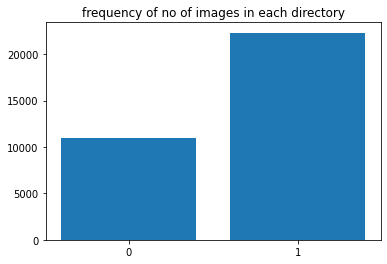

In [72]:
display_stats_about_Data(All_data_csv,'visualization')